In [24]:
!pip install tf-keras retina-face

In [25]:
from retinaface import RetinaFace

In [26]:
resp = RetinaFace.detect_faces(r"/content/Screenshot 2026-01-16 115037.png")

In [27]:
resp

{'face_1': {'score': np.float64(0.9996886253356934),
  'facial_area': [np.int64(513), np.int64(764), np.int64(609), np.int64(881)],
  'landmarks': {'right_eye': [np.float32(525.8227), np.float32(797.5242)],
   'left_eye': [np.float32(561.5379), np.float32(804.99506)],
   'nose': [np.float32(527.4757), np.float32(827.8592)],
   'mouth_right': [np.float32(526.99286), np.float32(846.9755)],
   'mouth_left': [np.float32(554.1706), np.float32(852.60974)]}},
 'face_2': {'score': np.float64(0.9995982050895691),
  'facial_area': [np.int64(147), np.int64(136), np.int64(170), np.int64(164)],
  'landmarks': {'right_eye': [np.float32(151.69644), np.float32(145.5361)],
   'left_eye': [np.float32(163.00134), np.float32(145.33183)],
   'nose': [np.float32(156.36464), np.float32(150.28658)],
   'mouth_right': [np.float32(152.57536), np.float32(156.96144)],
   'mouth_left': [np.float32(161.68552), np.float32(156.81079)]}},
 'face_3': {'score': np.float64(0.9995898604393005),
  'facial_area': [np.int64(

In [1]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/Screenshot 2026-01-16 115037.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [29]:
for face_key, face in resp.items():

    # bounding box
    x1, y1, x2, y2 = map(int, face["facial_area"])
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # landmarks
    for _, point in face["landmarks"].items():
        x, y = int(point[0]), int(point[1])
        cv2.circle(img, (x, y), 2, (255, 0, 0), -1)


(np.float64(-0.5), np.float64(1329.5), np.float64(885.5), np.float64(-0.5))

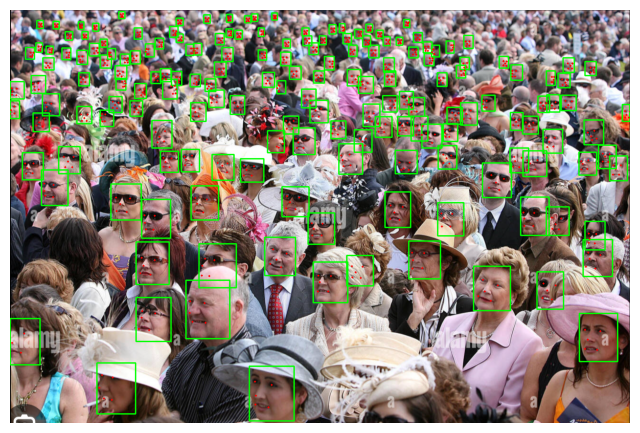

In [30]:
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis("off")


In [46]:
!nvidia-smi

Fri Jan 16 06:57:49 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   64C    P0             27W /   70W |   15092MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Yolov11


In [37]:
!pip install ultralytics

In [38]:
from ultralytics import YOLO

In [39]:
model = YOLO("/content/yolov11m-face.pt")

In [40]:
model.predict(r"/content/Screenshot 2026-01-16 115037.png", save=True, line_width=2, show_labels=False, show_conf=False)

OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 14.74 GiB of which 2.12 MiB is free. Process 84362 has 14.74 GiB memory in use. Of the allocated memory 225.83 MiB is allocated by PyTorch, and 12.17 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

### Insightface

In [2]:
!pip install insightface onnxruntime-gpu

In [3]:
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

In [4]:
img = cv2.imread("/content/Screenshot 2026-01-16 115037.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [5]:
app = FaceAnalysis(
    name="buffalo_l",     # best accuracy
    providers=["CUDAExecutionProvider", "CPUExecutionProvider"]
)

Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'sdpa_kernel': '0', 'use_tf32': '1', 'fuse_conv_bias': '0', 'prefer_nhwc': '0', 'tunable_op_max_tuning_duration_ms': '0', 'enable_skip_layer_norm_strict_mode': '0', 'tunable_op_tuning_enable': '0', 'tunable_op_enable': '0', 'use_ep_level_unified_stream': '0', 'device_id': '0', 'has_user_compute_stream': '0', 'gpu_external_empty_cache': '0', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'cudnn_conv1d_pad_to_nc1d': '0', 'gpu_mem_limit': '18446744073709551615', 'gpu_external_alloc': '0', 'gpu_external_free': '0', 'arena_extend_strategy': 'kNextPowerOfTwo', 'do_copy_in_default_stream': '1', 'enable_cuda_graph': '0', 'user_compute_stream': '0', 'cudnn_conv_use_max_workspace': '1'}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with o

In [6]:
app.prepare(ctx_id=0, det_size=(640, 640))

set det-size: (640, 640)


In [7]:
faces = app.get(img)

In [8]:
face = faces[0]

print(face.bbox)        # [x1, y1, x2, y2]
print(face.kps)         # 5 landmarks
print(face.normed_embedding.shape)  # (512,)


[547.9357  495.24103 617.4657  571.2508 ]
[[564.433   512.50165]
 [595.3241  523.3462 ]
 [572.03033 537.7923 ]
 [558.64014 544.9519 ]
 [584.32196 553.5527 ]]
(512,)


In [9]:
embedding = face.normed_embedding


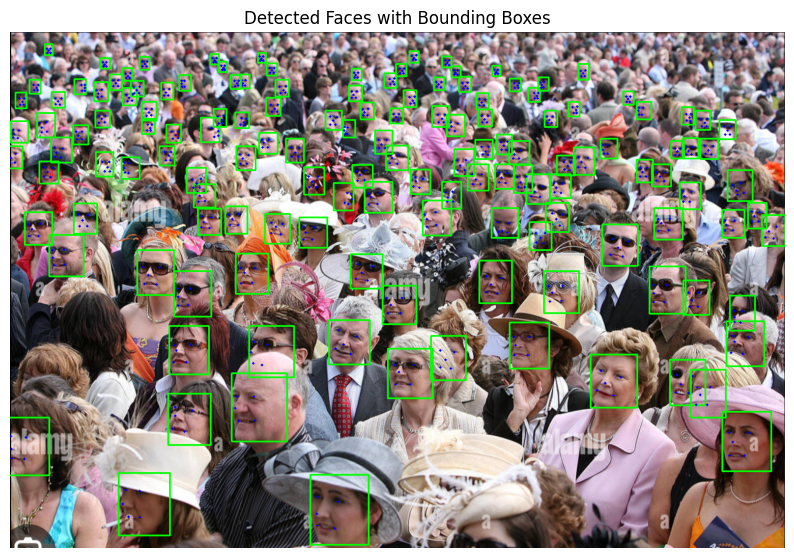

In [10]:
img_with_boxes = img.copy()

for face in faces:
    bbox = face.bbox.astype(int)
    x1, y1, x2, y2 = bbox[0], bbox[1], bbox[2], bbox[3]

    cv2.rectangle(img_with_boxes, (x1, y1), (x2, y2), (0, 255, 0), 2)

    if 'kps' in face:
        for kp in face.kps:
            x, y = kp.astype(int)
            cv2.circle(img_with_boxes, (x, y), 2, (0, 0, 255), -1)
plt.figure(figsize=(10, 10))
plt.imshow(img_with_boxes)
plt.title("Detected Faces with Bounding Boxes")
plt.axis("off")
plt.show()